# Case Study 03 - Artificial Neural Network


In [135]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [136]:
df = pd.read_csv(r"D:\Machine Learning\Case study\Case study 03\mobile_price_classification (1).csv")
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [137]:
df.shape

(2000, 21)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [139]:
df.describe()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [140]:
df.isna().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [141]:
df.nunique()

battery_power     1094
bluetooth            2
clock_speed         26
dual_sim             2
front_cam           20
4G                   2
int_memory          63
m_dep               10
mobile_wt          121
n_cores              8
primary_camera      21
px_height         1137
px_width          1109
ram               1562
sc_h                15
sc_w                19
talk_time           19
three_g              2
touch_screen         2
wifi                 2
price_range          4
dtype: int64

In [142]:
df['price_range'].nunique()

4

<AxesSubplot:>

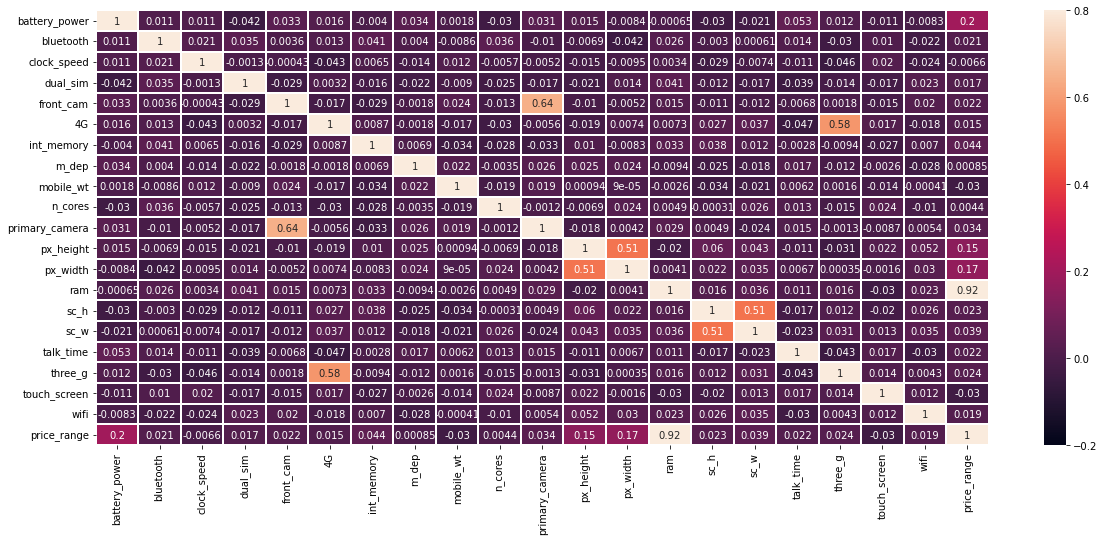

In [143]:
corrmatrix = df.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-.2,vmax=.8,annot=True,linewidth=.2)

In [144]:
X = df.iloc[:,:-1]

In [145]:
X.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,primary_camera,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [146]:
y = df.iloc[:,-1]

In [147]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [148]:
# Feature Selection for better results and accuracy
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [149]:
kbest = SelectKBest(chi2,k=10)
best_feaures = kbest.fit(X,y)

In [150]:
best_feaures.scores_

array([1.41298666e+04, 7.23232323e-01, 6.48365906e-01, 6.31010795e-01,
       1.01351665e+01, 1.52157239e+00, 8.98391244e+01, 7.45819631e-01,
       9.59728626e+01, 9.09755558e+00, 9.18605355e+00, 1.73635695e+04,
       9.81058675e+03, 9.31267519e+05, 9.61487832e+00, 1.64803191e+01,
       1.32364000e+01, 3.27642810e-01, 1.92842942e+00, 4.22090730e-01])

In [151]:
df_features = pd.DataFrame(best_feaures.scores_)
df_columns = pd.DataFrame(X.columns)

In [152]:
df_features = pd.DataFrame(best_feaures.scores_)
df_columns = pd.DataFrame(X.columns)
featureScores = pd.concat([df_columns,df_features],axis=1)
featureScores.columns = ['Features','Score']
featureScores.sort_values(by='Score',ascending=False)

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,front_cam,10.135166
14,sc_h,9.614878


In [153]:
X = df[['ram','px_height','battery_power','px_width','mobile_wt','int_memory','sc_w','talk_time','front_cam','sc_h']]
X.head()

,ram,px_height,battery_power,px_width,mobile_wt,int_memory,sc_w,talk_time,front_cam,sc_h
0,2549,20,842,756,188,7,7,19,1,9
1,2631,905,1021,1988,136,53,3,7,0,17
2,2603,1263,563,1716,145,41,2,9,2,11
3,2769,1216,615,1786,131,10,8,11,0,16
4,1411,1208,1821,1212,141,44,2,15,13,8


In [154]:
X = X.values
y = y.values

In [155]:
X.shape

(2000, 10)

In [156]:
y.shape

(2000,)

In [157]:
# normalisation and scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [158]:
pd.DataFrame(X).describe()

,0,1,2,3,4,5,6,7,8,9
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03
mean,-1.582068e-16,1.287304e-16,2.128298e-16,5.595524e-17,1.804112e-16,-8.754109e-17,-4.085621e-17,1.052491e-16,9.230117e-17,3.719247e-17
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00
min,-1.722711e+00,-1.454027e+00,-1.678817e+00,-1.739251e+00,-1.702391e+00,-1.656260e+00,-1.324131e+00,-1.649584e+00,-9.928904e-01,-1.734608e+00
25%,-8.453168e-01,-8.167289e-01,-8.804033e-01,-8.719579e-01,-8.829695e-01,-8.845346e-01,-8.649215e-01,-9.173306e-01,-7.624947e-01,-7.849833e-01
50%,2.055123e-02,-1.828116e-01,-2.849593e-02,-1.045034e-02,2.122020e-02,-2.563229e-03,-1.761069e-01,-2.013697e-03,-3.017032e-01,-7.276497e-02
75%,8.670548e-01,6.810064e-01,8.575560e-01,8.828792e-01,8.406421e-01,8.794082e-01,7.423125e-01,9.133032e-01,6.198797e-01,8.768595e-01
max,1.727851e+00,2.963672e+00,1.728812e+00,1.727608e+00,1.688320e+00,1.761380e+00,2.808756e+00,1.645557e+00,3.384628e+00,1.589078e+00


In [159]:
y = y.reshape(-1,1)

In [160]:
# converting y labels to one hot encoder
from sklearn.preprocessing import OneHotEncoder
ohot = OneHotEncoder()
y = ohot.fit_transform(y)

In [161]:
y = y.toarray()

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.25, random_state=42)

In [163]:
from keras.models import Sequential
from keras.layers import Dense

In [164]:
model = Sequential()
model.add(Dense(8,activation='relu',input_dim = 10))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 88        
                                                                 
 dense_10 (Dense)            (None, 6)                 54        
                                                                 
 dense_11 (Dense)            (None, 4)                 28        
                                                                 
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________


In [165]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [166]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200)

Epoch 1/200
13/13 [==============================] - 1s 31ms/step - loss: 0.7211 - accuracy: 0.2350 - val_loss: 0.7033 - val_accuracy: 0.2300
Epoch 2/200
13/13 [==============================] - 0s 9ms/step - loss: 0.7033 - accuracy: 0.2375 - val_loss: 0.6881 - val_accuracy: 0.2300
Epoch 3/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6881 - accuracy: 0.2325 - val_loss: 0.6750 - val_accuracy: 0.2500
Epoch 4/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6747 - accuracy: 0.2375 - val_loss: 0.6630 - val_accuracy: 0.2600
Epoch 5/200
13/13 [==============================] - 0s 8ms/step - loss: 0.6622 - accuracy: 0.2450 - val_loss: 0.6522 - val_accuracy: 0.2700
Epoch 6/200
13/13 [==============================] - 0s 7ms/step - loss: 0.6507 - accuracy: 0.2700 - val_loss: 0.6421 - val_accuracy: 0.2300
Epoch 7/200
13/13 [==============================] - 0s 9ms/step - loss: 0.6400 - accuracy: 0.2625 - val_loss: 0.6327 - val_accuracy: 0.2300
Epoch 8/200


In [167]:
y_pred = model.predict(X_test)

47/47 [==============================] - 0s 3ms/step


In [168]:
# inverse one hot encoding
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
    
# also inverse encoding for y_test labels

test = []
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [169]:
# accuracy of the model
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred,test)
print("Accuracy of Your Model is = " + str(acc*100))

Accuracy of Your Model is = 94.19999999999999


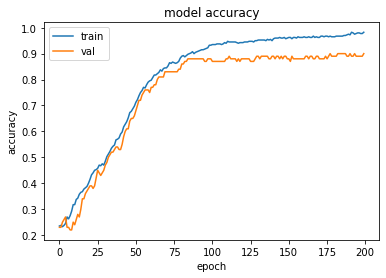

In [170]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

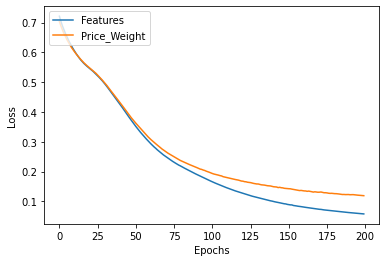

In [171]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()